In [4]:
from sklearn import datasets, model_selection, svm, metrics

mnist = datasets.load_digits()

In [5]:
mnist.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [7]:
mnist.data.shape

(1797, 64)

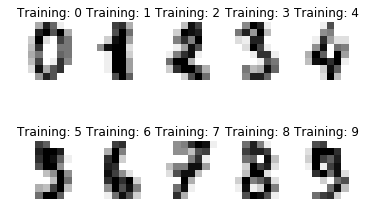

In [19]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(mnist.images, mnist.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i' % label)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=0)

In [27]:
x_train.shape

(1347, 64)

In [28]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
clf.score(x_train, y_train)

1.0

In [31]:
clf.score(x_test, y_test)

0.48666666666666669

In [36]:
print(mnist.target[-10:])# 正解
print(clf.predict(mnist.data[-10:])) # 予測

[5 4 8 8 4 9 0 8 9 8]
[4 4 8 8 4 9 0 8 9 8]
